In [ ]:
%matplotlib inline
%pylab inline

import numpy
import matplotlib

file1 = open('D:/ZidData/OSheaLab/Solexa/RiboZero/BY_EY_RPKminusRibo.txt','r')
file2 = open('D:/ZidData/OSheaLab/Solexa/Alignments/1DPFeaturesORFs.xls','r')
#file3 = open('/Zid/Science/Solexa/RBG.txt','r')
#file2 = open('/Zid/Science/SolexaReads/3_6_14e14p9_Resequences/3Pp35CombFeatures.txt','r')
#file2 = open('/Zid/Science/Solexa/GluTime2/Aligning/S1_7FeaturesORFs3Pp35.xls','r')
#file2 = open('/Zid/Analysis/6Pp149SortFeatures.xls','r')
column = 11
#need to change this to normalize reads 
smoothnum = 1
Norm = 0.75
tct = 5; lngth = 1050
tc1 = 2.5
tc2 = -0.5
tl1 = -0.75
tl2 = 0.25
ro1 = 0.75
ro2 = -2.0
dic1 = {}
tdic = {}
tname = 'Q0070'
nameLst=[]

#tname ='YAL062W'
#for line3 in file3:
#    temp6 = line3.rstrip()
#    temp7 = temp6.split('\t')
#    nameTmp = temp7[0]
    #name7 =temp7[2]
#    name7 = nameTmp[0:7]
    #print name7
#    nameLst.append(name7)
    
for line2 in file2:
    temp2 = line2.rstrip()
    temp3 = temp2.split('\t')
    name = temp3[0]
   
    if name!= tname :
        dic1[tname] = tdic
        tdic = {}
        tdic[temp3[3]] = temp3[4]
        tname = name
    else:
        tdic[temp3[3]] = temp3[4]
dic1[tname] = tdic
file2.close()
x1=0
x2=0
x3=0
x4=0
Ln=0
Ln4=0
Lt=0
Lt4=0

myList = [0.0]*2016
myList2 = [0.0]*2016
myList3 = [0.0]*2016
myList4 = [0.0]*2016

file1.readline()
for line in file1:
    temp = line.rstrip()
    temp1 = temp.split('\t')
    name = temp1[0]
    if temp1[column]:
        Tcount = float(temp1[column]) #This is length normalized RPK
    else:
        Tcount = 0.0
    testLen = abs(int(temp1[2])-int(temp1[3]))
    
    if name in dic1 and Tcount > tct and testLen >=lngth:
        ribooc = float(temp1[17]) 
        #tc = float(temp1[8])
        #tl = float(temp1[9])
        x1+=1
        if ribooc >= ro1:
            x2+=1
        elif ribooc <= ro2:
            x3+=1
        
        #if tc >= tc1 and tl<=tl1:
        #    x2+=1
       #elif tc >= tc1 and tl>=tl2:
        #    x3+=1
        #elif tc <= tc2: 
        #elif name in ('YJL130C','YKL182W','YPL231W','YPL160W','YBL076C','YDL185W','YGR240C','YMR205C','YGL008C','YER091C',
        #                     'YMR058W','YOR204W','YGR155W','YPL061W','YGL253W','YCR012W','YLR180W','YPR035W',
        #                      'YBR249C'):#, 'YAL038W','YBR196C','YLR249W','YGR192C','YGL008C','YKL060C','YHR174W','YLR110C','YER091C'):
        #if name in nameLst:
            #x4+=1
        
        strt = int(temp1[2])
        orien = name[6]
        tdic = {}
        tdic = dic1[name]
        for item in tdic:
            posit = int(item)
          
            count = float(tdic[item])
            NormP = count/Tcount
            if orien == 'W':
                diff = (posit+16) - strt
            elif orien == 'C':
                diff = strt - (posit-17)
            if diff < 1000 and diff > -16:
                myList[diff] = myList[diff]+NormP
                #if tc >= tc1 and tl<=tl1:
                if ribooc >= ro1:
                    myList2[diff] = myList2[diff]+NormP
                #elif tc >= tc1 and tl>=tl2 :
                elif ribooc <= ro2:
                    myList3[diff] = myList3[diff]+NormP
                #elif tc <= tc2:
                                      
                #elif name == 'YCR012W':#in nameLst:
                    
                #elif name in ('YJL130C','YKL182W','YPL231W','YPL160W','YBL076C','YDL185W','YGR240C','YMR205C','YGL008C','YER091C',
                #              'YMR058W','YOR204W','YGR155W','YPL061W','YGL253W','YCR012W','YLR180W','YPR035W',
                #              'YBR249C'):#, 'YAL038W','YBR196C','YLR249W','YGR192C','YGL008C','YKL060C','YHR174W','YLR110C','YER091C'):
                #    myList4[diff] = myList4[diff]+NormP
file1.close()
#print myList2

def smooth (tList):
    tlen = len(tList)
    tList1 = [0.0]*2012
    for i in range(len(tList)):
        if i >= tlen -100:
            break
        #tList1[i]= tList[i]
        tList1[i]= average(tList[i:i+100])
    return tList1

def aggregate (tList):
    tlen = len(tList)
    x1 = 0
    x2 = 0
    x3 =0
    x4 = 0
    count = 0
    for i in range(len(tList)):
        count+=1
        if count > 30 and count <500:
            if count%4 == 0:
                x1 = x1 + tList[i]
            elif count%4 == 1:
                x2 = x2 + tList[i]
            elif count%4 == 2:
                x3 = x3 + tList[i]
            #else:
            #    x4 = x4+ tList[i]
    ListL = [x1,x2,x3]
    return ListL      
x = range(-4, 2008, 1)
print ('All - '+str(x1)+',    Count>'+str(tct)+',  Length>'+str(lngth))
print ('Tc>'+str(tc1)+', Tl<'+str(tl1)+' - '+str(x2))
print ('Tc>'+str(tc1)+', Tl>'+str(tl2)+' - '+str(x3))
#print ('Tc<'+str(tc2)+' - '+str(x4))

tmyList = [(y/x1)*100*Norm for y in myList]
tmyList2 = [(y/x2)*100*Norm for y in myList2]
tmyList3 = [(y/x3)*100*Norm for y in myList3]
#tmyList4 = [(y/x4)*100*Norm for y in myList4]

tSList = smooth(tmyList)
tSList2 = smooth(tmyList2)
tSList3 = smooth(tmyList3)
#tSList4 = smooth(tmyList4)

from pylab import  *
rcParams['figure.figsize'] = 12,8

from matplotlib import rcParams
rcParams['xtick.direction'] = 'out'
rcParams['ytick.direction'] = 'out'
pylab.rc("axes", linewidth=3.0)
pylab.rc("lines", markeredgewidth=3)
matplotlib.rcParams.update({'font.size': 32})
matplotlib.rcParams.update({'font.family':'Arial'})

figure(1)
plot (x,tSList,'k',  linewidth=2, label ='All')
plot(x, tSList3,'r', linewidth=2,  label ='Group 1') #Tc>'+str(tc1)+', Tl>'+str(tl2))
plot (x, tSList2,'b', linewidth=2, label ='Group 2') #Tc>'+str(tc1)+', Tl<'+str(tl1))
plot(x, tSList4,'g',  linewidth=2, label ='Group 3')
#plt.legend(loc="upper right")
#plt.title('Ribosome -Glu 15m, +Glu 5m, 50bp sliding window')#-Glu 15m, +Glu 1m
ylabel('Ribosomal Occupancy')
xlabel('Distance from AUG (bp)')
ylim(ymax =0.3)
xlim(xmin = -5, xmax = 500)
figure(2)
plot (x,tSList,'k', linewidth=2, label ='All')
plot(x, tSList3,'r', linewidth=2,label ='Group 1') #Tc>'+str(tc1)+', Tl>'+str(tl2))
plot (x, tSList2,'b', linewidth=2, label ='Group 2') #Tc>'+str(tc1)+', Tl<'+str(tl1))
plot(x, tSList4,'g',  linewidth=2, label ='Group 3')
#plt.legend(loc="upper right")
#plt.title('Ribosome -Glu 15m, +Glu 5m')#-Glu 15m')
ylabel('Ribosomal Occupancy')
xlabel('Distance from AUG (bp)')
ylim(ymax = 6)
xlim(xmin = -5, xmax = 50)
figure(3)
plot (x,tSList,'k',  linewidth=2, label ='All')
plot(x, tSList3,'r',  linewidth=2, label ='Group 1') #Tc>'+str(tc1)+', Tl>'+str(tl2))
plot (x, tSList2,'b', linewidth=2, label ='Group 2') #Tc>'+str(tc1)+', Tl<'+str(tl1))
plot(x, tSList4,'g',  linewidth=2, label ='Group 3')
#plt.legend(loc="upper right")
#plt.title('Ribosome -Glu 15m, +Glu 5m, 200bp sliding window')#-Glu 15m,+Glu 5m 200bp sliding window')
ylabel('Ribosomal Occupancy')
xlabel('Distance from AUG (bp)')
ylim(ymax = 0.31)
xlim(xmin = -5, xmax = 850)

def hide_spines():
    """Hides the top and rightmost axis spines from view for all active
    figures and their respective axes."""

    # Retrieve a list of all current figures.
    figures = [x for x in matplotlib._pylab_helpers.Gcf.get_all_fig_managers()]
    for figure in figures:
        # Get all Axis instances related to the figure.
        for ax in figure.canvas.figure.get_axes():
            ax.xaxis.set_tick_params(length=7)
            ax.yaxis.set_tick_params(length=7)
            # Disable spines.
            ax.spines['right'].set_color('none')
            ax.spines['top'].set_color('none')
            # Disable ticks.
            ax.xaxis.set_ticks_position('bottom')
            ax.yaxis.set_ticks_position('left')

hide_spines()
show()


In [ ]:
%matplotlib inline
%pylab inline

import numpy
import matplotlib

file1 = open('/ZidData/OSheaLab/Solexa/RiboZero/BY_EY_RPK.txt','r')
file2 = open('/ZidData/OSheaLab/Solexa/Alignments/4DbPFeaturesORFs.xls','r')

column = 11
#need to change this to normalize reads 
smoothnum = 1
Norm = 0.75
tct = 50; lngth = 800
tc1 = 2.5
tc2 = -1.25
tl1 = -1.0
tl2 = 0
dic1 = {}
tdic = {}
tname = 'Q0070'
nameLst=[]

#tname ='YAL062W'
#for line3 in file3:
#    temp6 = line3.rstrip()
#    temp7 = temp6.split('\t')
#    nameTmp = temp7[0]
    #name7 =temp7[2]
#    name7 = nameTmp[0:7]
    #print name7
#    nameLst.append(name7)
    
for line2 in file2:
    temp2 = line2.rstrip()
    temp3 = temp2.split('\t')
    name = temp3[0]
   
    if name!= tname :
        dic1[tname] = tdic
        tdic = {}
        tdic[temp3[3]] = temp3[4]
        tname = name
    else:
        tdic[temp3[3]] = temp3[4]
dic1[tname] = tdic
file2.close()
x1=0
x2=0
x3=0
x4=0
Ln=0
Ln4=0
Lt=0
Lt4=0

myList = [0.0]*5016
#myList2 = [0.0]*3016
#myList3 = [0.0]*3016
#myList4 = [0.0]*3016

file1.readline()
for line in file1:
    temp = line.rstrip()
    temp1 = temp.split('\t')
    name = temp1[0]
    if temp1[column]:
        Tcount = float(temp1[column]) #This is length normalized RPK
    else:
        Tcount = 0.0
    testLen = abs(int(temp1[1])-int(temp1[2]))
    
    if name in dic1 and testLen >=lngth and Tcount > tct:
        
        tc = float(temp1[8])
        tl = float(temp1[9])
        x1+=1
        
        strt = int(temp1[1])
        
        orien = name[6]
        tdic = {}
        tdic = dic1[name]
        for item in tdic:
            posit = int(item)
          
            count = float(tdic[item])
            NormP = count/Tcount
            if orien == 'W':
                diff = (posit+16) - strt
            elif orien == 'C':
                diff = strt - (posit-17)
            if diff < 5000 and diff > -16:
                myList[diff] = myList[diff]+NormP
                #if tc >= tc1 and tl<=tl1:
                #    myList2[diff] = myList2[diff]+NormP
                #elif tc >= tc1 and tl>=tl2 :
                #    myList3[diff] = myList3[diff]+NormP
                #elif tc <= tc2:
                                      
                #elif name == 'YCR012W':#in nameLst:
                    
                #elif name in ('YLR044C','YCR012W'):#, 'YAL038W','YBR196C','YLR249W','YGR192C','YGL008C','YKL060C','YHR174W','YLR110C','YER091C'):
                 #   myList4[diff] = myList4[diff]+NormP
file1.close()
#print myList2

def smooth (tList):
    tlen = len(tList)
    tList1 = [0.0]*5016
    for i in range(len(tList)):
        if i >= tlen -100:
            break
        #tList1[i]= tList[i]
        tList1[i]= average(tList[i:i+250])
    return tList1

#def aggregate (tList):
#    tlen = len(tList)
#    x1 = 0
#    x2 = 0
#    x3 =0
#    count = 0
#    for i in range(len(tList)):
#        count+=1
#        if count > 30 and count <500:
#            if count%3 == 0:
#                x1 = x1 + tList[i]
#            elif count%3 == 1:
#                x2 = x2 + tList[i]
#            else:
#                x3 = x3 + tList[i]
#    ListL = [x1,x2,x3]
#    return ListL     


x = range(-4, 5012, 1)
print ('All - '+str(x1)+',    Count>'+str(tct)+',  Length>'+str(lngth))
#print ('Tc>'+str(tc1)+', Tl<'+str(tl1)+' - '+str(x2))
#print ('Tc>'+str(tc1)+', Tl>'+str(tl2)+' - '+str(x3))
#print ('Tc<'+str(tc2)+' - '+str(x4))

tmyList = [(y/x1)*100*Norm for y in myList]
#tmyList2 = [(y/x2)*100*Norm for y in myList2]
#tmyList3 = [(y/x3)*100*Norm for y in myList3]
#tmyList4 = [(y/x4)*100*Norm for y in myList4]

tSList = smooth(tmyList)

print len(x)
print len(tSList)
#tSList2 = smooth(tmyList2)
#tSList3 = smooth(tmyList3)
#tSList4 = smooth(tmyList4)

from pylab import  *
rcParams['figure.figsize'] = 12,8

from matplotlib import rcParams
rcParams['xtick.direction'] = 'out'
rcParams['ytick.direction'] = 'out'
pylab.rc("axes", linewidth=3.0)
pylab.rc("lines", markeredgewidth=3)
matplotlib.rcParams.update({'font.size': 32})
matplotlib.rcParams.update({'font.family':'Arial'})

figure(1)
plot (x,tSList,'k',  linewidth=2, label ='All')
#plot(x, tSList3,'r', linewidth=2,  label ='Group 1') #Tc>'+str(tc1)+', Tl>'+str(tl2))
#plot (x, tSList2,'b', linewidth=2, label ='Group 2') #Tc>'+str(tc1)+', Tl<'+str(tl1))
#plot(x, tSList4,'g',  linewidth=2, label ='Group 3')
#plt.legend(loc="upper right")
#plt.title('Ribosome -Glu 15m, +Glu 5m, 50bp sliding window')#-Glu 15m, +Glu 1m
ylabel('Ribosomal Occupancy')
xlabel('Distance from AUG (bp)')
ylim(ymax =0.10)
xlim(xmin = -5, xmax = 4900)
figure(2)
plot (x,tSList,'k', linewidth=2, label ='All')
#plot(x, tSList3,'r', linewidth=2,label ='Group 1') #Tc>'+str(tc1)+', Tl>'+str(tl2))
#plot (x, tSList2,'b', linewidth=2, label ='Group 2') #Tc>'+str(tc1)+', Tl<'+str(tl1))
#plot(x, tSList4,'g',  linewidth=2, label ='Group 3')
#plt.legend(loc="upper right")
#plt.title('Ribosome -Glu 15m, +Glu 5m')#-Glu 15m')
ylabel('Ribosomal Occupancy')
xlabel('Distance from AUG (bp)')
ylim(ymax = 6)
xlim(xmin = -5, xmax = 50)
figure(3)
plot (x,tSList,'k',  linewidth=2, label ='All')
#plot(x, tSList3,'r',  linewidth=2, label ='Group 1') #Tc>'+str(tc1)+', Tl>'+str(tl2))
#plot (x, tSList2,'b', linewidth=2, label ='Group 2') #Tc>'+str(tc1)+', Tl<'+str(tl1))
#plot(x, tSList4,'g',  linewidth=2, label ='Group 3')
#plt.legend(loc="upper right")
#plt.title('Ribosome -Glu 15m, +Glu 5m, 200bp sliding window')#-Glu 15m,+Glu 5m 200bp sliding window')
ylabel('Ribosomal Occupancy')
xlabel('Distance from AUG (bp)')
ylim(ymax = 0.31)
xlim(xmin = -5, xmax = 750)

def hide_spines():
    """Hides the top and rightmost axis spines from view for all active
    figures and their respective axes."""

    # Retrieve a list of all current figures.
    figures = [x for x in matplotlib._pylab_helpers.Gcf.get_all_fig_managers()]
    for figure in figures:
        # Get all Axis instances related to the figure.
        for ax in figure.canvas.figure.get_axes():
            ax.xaxis.set_tick_params(length=7)
            ax.yaxis.set_tick_params(length=7)
            # Disable spines.
            ax.spines['right'].set_color('none')
            ax.spines['top'].set_color('none')
            # Disable ticks.
            ax.xaxis.set_ticks_position('bottom')
            ax.yaxis.set_ticks_position('left')

hide_spines()
show()

In [ ]:
%matplotlib inline
%pylab inline

import numpy
import matplotlib

x =[1,2,3,4,5,6]
y = [2,4,7,9,10,12]


figure(1)
plot (x,y)

In [ ]:
file1 = open('/ZidLab/Solexa/OtherPeoples/Guydosh/SRR1042851_wtMRNA.sra','r')
print file1.readline()
print file1.readline()


In [ ]:
%matplotlib inline
%pylab inline

import numpy
import matplotlib

file1 = open('D:/ZidData/OSheaLab/Solexa/RiboZero/BY_EY_RPKminusRibo.txt','r')
file2 = open('D:/ZidData/OSheaLab/Solexa/Alignments/1DPFeaturesORFs.xls','r')
#file3 = open('/Zid/Science/Solexa/RBG.txt','r')
#file2 = open('/Zid/Science/SolexaReads/3_6_14e14p9_Resequences/3Pp35CombFeatures.txt','r')
#file2 = open('/Zid/Science/Solexa/GluTime2/Aligning/S1_7FeaturesORFs3Pp35.xls','r')
#file2 = open('/Zid/Analysis/6Pp149SortFeatures.xls','r')
column = 11
#need to change this to normalize reads 
smoothnum = 1
Norm = 0.75
tct = 5; lngth = 800
tc1 = 2.5
tc2 = -0.5
tl1 = -0.75
tl2 = 0.25
ro1 = 0.5
ro2 = -2.0
dic1 = {}
tdic = {}
tname = 'Q0070'
nameLst=[]

#tname ='YAL062W'
#for line3 in file3:
#    temp6 = line3.rstrip()
#    temp7 = temp6.split('\t')
#    nameTmp = temp7[0]
    #name7 =temp7[2]
#    name7 = nameTmp[0:7]
    #print name7
#    nameLst.append(name7)
    
for line2 in file2:
    temp2 = line2.rstrip()
    temp3 = temp2.split('\t')
    name = temp3[0]
   
    if name!= tname :
        dic1[tname] = tdic
        tdic = {}
        tdic[temp3[3]] = temp3[4]
        tname = name
    else:
        tdic[temp3[3]] = temp3[4]
dic1[tname] = tdic
file2.close()
x1=0
x2=0
x3=0
x4=0
Ln=0
Ln4=0
Lt=0
Lt4=0

myList = [0.0]*2016
myList2 = [0.0]*2016
myList3 = [0.0]*2016
#myList4 = [0.0]*2016

file1.readline()
for line in file1:
    temp = line.rstrip()
    temp1 = temp.split('\t')
    name = temp1[0]
    if temp1[column]:
        Tcount = float(temp1[column]) #This is length normalized RPK
    else:
        Tcount = 0.0
    testLen = abs(int(temp1[2])-int(temp1[3]))
    
    if name in dic1 and Tcount > tct and testLen >=lngth:
        ribooc = float(temp1[17]) 
        #tc = float(temp1[8])
        #tl = float(temp1[9])
        x1+=1
        if ribooc >= ro1:
            x2+=1
        elif ribooc <= ro2:
            x3+=1
        
        #if tc >= tc1 and tl<=tl1:
        #    x2+=1
        #elif tc >= tc1 and tl>=tl2:
        #    x3+=1
        #elif tc <= tc2: 
        #elif name in ('YJL130C','YKL182W','YPL231W','YPL160W','YBL076C','YDL185W','YGR240C','YMR205C','YGL008C','YER091C',
        #                     'YMR058W','YOR204W','YGR155W','YPL061W','YGL253W','YCR012W','YLR180W','YPR035W',
        #                      'YBR249C'):#, 'YAL038W','YBR196C','YLR249W','YGR192C','YGL008C','YKL060C','YHR174W','YLR110C','YER091C'):
        #if name in nameLst:
            #x4+=1
        
        strt = int(temp1[2])
        orien = name[6]
        tdic = {}
        tdic = dic1[name]
        for item in tdic:
            posit = int(item)
          
            count = float(tdic[item])
            NormP = count/Tcount
            if orien == 'W':
                diff = (posit+16) - strt
            elif orien == 'C':
                diff = strt - (posit-17)
            if diff < 1000 and diff > -16:
                myList[diff] = myList[diff]+NormP
                #if tc >= tc1 and tl<=tl1:
                if ribooc >= ro1:
                    myList2[diff] = myList2[diff]+NormP
                #elif tc >= tc1 and tl>=tl2 :
                elif ribooc <= ro2:
                    myList3[diff] = myList3[diff]+NormP
                #elif tc <= tc2:
                                      
                #elif name == 'YCR012W':#in nameLst:
                    
                #elif name in ('YJL130C','YKL182W','YPL231W','YPL160W','YBL076C','YDL185W','YGR240C','YMR205C','YGL008C','YER091C',
                #              'YMR058W','YOR204W','YGR155W','YPL061W','YGL253W','YCR012W','YLR180W','YPR035W',
                #              'YBR249C'):#, 'YAL038W','YBR196C','YLR249W','YGR192C','YGL008C','YKL060C','YHR174W','YLR110C','YER091C'):
                #    myList4[diff] = myList4[diff]+NormP
file1.close()
#print myList2

def smooth (tList):
    tlen = len(tList)
    tList1 = [0.0]*2012
    for i in range(len(tList)):
        if i >= tlen -100:
            break
        tList1[i]= tList[i]
        #tList1[i]= average(tList[i:i+200])
    return tList1

def aggregate (tList):
    tlen = len(tList)
    x1 = 0
    x2 = 0
    x3 =0
    x4 = 0
    count = 0
    for i in range(len(tList)):
        count+=1
        if count > 30 and count <500:
            if count%4 == 0:
                x1 = x1 + tList[i]
            elif count%4 == 1:
                x2 = x2 + tList[i]
            elif count%4 == 2:
                x3 = x3 + tList[i]
            #else:
            #    x4 = x4+ tList[i]
    ListL = [x1,x2,x3]
    return ListL      
x = range(-4, 2008, 1)
print ('All - '+str(x1)+',    Count>'+str(tct)+',  Length>'+str(lngth))
print ('Tc>'+str(tc1)+', Tl<'+str(tl1)+' - '+str(x2))
print ('Tc>'+str(tc1)+', Tl>'+str(tl2)+' - '+str(x3))
#print ('Tc<'+str(tc2)+' - '+str(x4))

tmyList = [(y/x1)*100*Norm for y in myList]
tmyList2 = [(y/x2)*100*Norm for y in myList2]
tmyList3 = [(y/x3)*100*Norm for y in myList3]
#tmyList4 = [(y/x4)*100*Norm for y in myList4]

tSList = smooth(tmyList)
tSList2 = smooth(tmyList2)
tSList3 = smooth(tmyList3)
#tSList4 = smooth(tmyList4)

from pylab import  *
rcParams['figure.figsize'] = 12,8

from matplotlib import rcParams
rcParams['xtick.direction'] = 'out'
rcParams['ytick.direction'] = 'out'
pylab.rc("axes", linewidth=3.0)
pylab.rc("lines", markeredgewidth=3)
matplotlib.rcParams.update({'font.size': 32})
matplotlib.rcParams.update({'font.family':'Arial'})

figure(1)
plot (x,tSList,'k',  linewidth=2, label ='All')
plot(x, tSList3,'b', linewidth=2,  label ='Group 1') #Tc>'+str(tc1)+', Tl>'+str(tl2))
plot (x, tSList2,'r', linewidth=2, label ='Group 2') #Tc>'+str(tc1)+', Tl<'+str(tl1))
#plot(x, tSList4,'g',  linewidth=2, label ='Group 3')
#plt.legend(loc="upper right")
#plt.title('Ribosome -Glu 15m, +Glu 5m, 50bp sliding window')#-Glu 15m, +Glu 1m
ylabel('Ribosomal Occupancy')
xlabel('Distance from AUG (bp)')
ylim(ymax =0.5)
xlim(xmin = 0, xmax = 100)
figure(2)
plot (x,tSList,'k', linewidth=2, label ='All')
plot(x, tSList3,'b', linewidth=2,label ='Group 1') #Tc>'+str(tc1)+', Tl>'+str(tl2))
plot (x, tSList2,'r', linewidth=2, label ='Group 2') #Tc>'+str(tc1)+', Tl<'+str(tl1))
#plot(x, tSList4,'g',  linewidth=2, label ='Group 3')
#plt.legend(loc="upper right")
#plt.title('Ribosome -Glu 15m, +Glu 5m')#-Glu 15m')
ylabel('Ribosomal Occupancy')
xlabel('Distance from AUG (bp)')
ylim(ymax = 4)
xlim(xmin = -5, xmax = 50)
figure(3)
plot (x,tSList,'k',  linewidth=2, label ='All')
plot(x, tSList3,'b',  linewidth=2, label ='Group 1') #Tc>'+str(tc1)+', Tl>'+str(tl2))
plot (x, tSList2,'r', linewidth=2, label ='Group 2') #Tc>'+str(tc1)+', Tl<'+str(tl1))
#plot(x, tSList4,'g',  linewidth=2, label ='Group 3')
#plt.legend(loc="upper right")
#plt.title('Ribosome -Glu 15m, +Glu 5m, 200bp sliding window')#-Glu 15m,+Glu 5m 200bp sliding window')
ylabel('Ribosomal Occupancy')
xlabel('Distance from AUG (bp)')
ylim(ymax = 0.35)
xlim(xmin = -5, xmax = 700)

def hide_spines():
    """Hides the top and rightmost axis spines from view for all active
    figures and their respective axes."""

    # Retrieve a list of all current figures.
    figures = [x for x in matplotlib._pylab_helpers.Gcf.get_all_fig_managers()]
    for figure in figures:
        # Get all Axis instances related to the figure.
        for ax in figure.canvas.figure.get_axes():
            ax.xaxis.set_tick_params(length=7)
            ax.yaxis.set_tick_params(length=7)
            # Disable spines.
            ax.spines['right'].set_color('none')
            ax.spines['top'].set_color('none')
            # Disable ticks.
            ax.xaxis.set_ticks_position('bottom')
            ax.yaxis.set_ticks_position('left')

hide_spines()
show()


Populating the interactive namespace from numpy and matplotlib


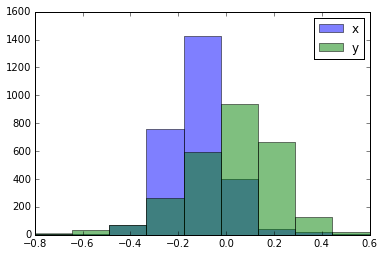

In [40]:
%matplotlib inline
%pylab inline


import numpy as np
import scipy.stats as stats
import pylab as pl

file1 = open('C:/Zid/SolexaDataAnalysis/Polarity_5_29_18.txt','r')

column = 6
column2 = 8
file1.readline()
polarity1 = []
polarity2 = []

for line in file1:
    temp = line.rstrip()
    temp1 = temp.split('\t')
    name = temp1[0]
    if temp1[column]:
        #tPol1=float(temp1[column])+0.1
        #tPol1=float(temp1[column2])+0.1
        polarity1.append(float(temp1[column])+0.1)
        polarity2.append(float(temp1[column2])+0.1)
        
sortPol = sorted(polarity1)  #sorted
sortPol2 = sorted(polarity2)

bins = numpy.linspace(-0.8, 0.6, 10)

pyplot.hist(sortPol, bins, alpha=0.5, label='x')
pyplot.hist(sortPol2, bins, alpha=0.5, label='y')
pyplot.legend(loc='upper right')
pyplot.show()

Populating the interactive namespace from numpy and matplotlib


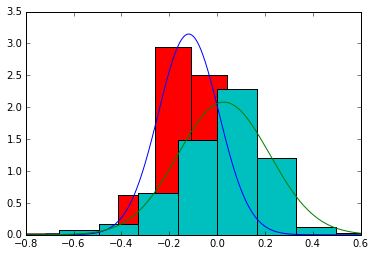

In [47]:
%matplotlib inline
%pylab inline


import numpy as np
import scipy.stats as stats
import pylab as pl

file1 = open('C:/Zid/SolexaDataAnalysis/Polarity_5_29_18.txt','r')

column = 6
column2 = 8
file1.readline()
polarity1 = []
polarity2 = []

for line in file1:
    temp = line.rstrip()
    temp1 = temp.split('\t')
    name = temp1[0]
    if temp1[column]:
        #tPol1=float(temp1[column])+0.1
        #tPol1=float(temp1[column2])+0.1
        polarity1.append(float(temp1[column])+0.1)
        polarity2.append(float(temp1[column2])+0.1)
        
sortPol = sorted(polarity1)  #sorted
sortPol2 = sorted(polarity2)

fit = stats.norm.pdf(sortPol, np.mean(sortPol), np.std(sortPol))  #this is a fitting indeed
fit2 = stats.norm.pdf(sortPol2, np.mean(sortPol2), np.std(sortPol2))
pl.plot(sortPol,fit)
pl.plot(sortPol2,fit2)
xlim(xmin = -0.8, xmax = 0.6)
#'-o'
pl.hist(sortPol,normed=True)      #use this to draw histogram of your data
pl.hist(sortPol2,normed=True)

pl.show()                   #use may also need add this 


Populating the interactive namespace from numpy and matplotlib


(-0.8, 0.6)

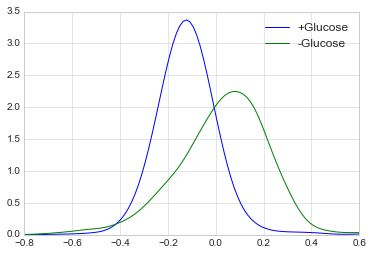

In [13]:
%matplotlib inline
%pylab inline

import numpy as np
import seaborn as sns

file1 = open('C:/Zid/SolexaDataAnalysis/Polarity_5_29_18.txt','r')

column = 6
column2 = 8
file1.readline()
polarity1 = []
polarity2 = []

for line in file1:
    temp = line.rstrip()
    temp1 = temp.split('\t')
    name = temp1[0]
    if temp1[column]:
        #tPol1=float(temp1[column])+0.1
        #tPol1=float(temp1[column2])+0.1
        polarity1.append(float(temp1[column])+0.1)
        polarity2.append(float(temp1[column2])+0.1)
        
sortPol = sorted(polarity1)  #sorted
sortPol2 = sorted(polarity2)

sns.set_style('whitegrid')
sns.kdeplot(np.array(sortPol), bw=0.05, label='+Glucose')
sns.kdeplot(np.array(sortPol2), bw=0.05, label='-Glucose')
pyplot.legend(loc='upper right')
xlim(xmin = -0.8, xmax = 0.6)

In [7]:
file1 = open('D:/ZidData/SolexaReads/BY-Ribo__-Glu15A.txt','r')
x=0
while x<100:
    print file1.readline()
    x+=1
file1.close()

ILLUMINA-3AB384_0001:7:1:1031:3097#0/1:TAGTTTCTTTACTTATTCAATGAANNNAAAAAAAAA:bbb__b_^b\_bbbbbbbbBBBBBBBBBBBBBBBBB

ILLUMINA-3AB384_0001:7:1:1033:21045#0/1:GTAATTCTAGAGCTAATACATGCCNAAAAAAAAAAA:b_abbb\_`b_babbb\_ba`b_bB__W]Ya_^]]Y

ILLUMINA-3AB384_0001:7:1:1034:8764#0/1:CTCGAATATATTAGCATGGAATAANAAAAAAAAAAA:Yba\babb^bb^bb\b`[b`^aaaBaa`ZY\\\\\\

ILLUMINA-3AB384_0001:7:1:1034:15226#0/1:TGAAGATAGAGAAACCATGGACAGNGAAAAAAAAAA:^b]^bYb^\[[\`\\]^^[_WZXPBUHZXZa^\\\\

ILLUMINA-3AB384_0001:7:1:1036:19757#0/1:TGCATACTACCTCTGAAGAATTGATAAAAAAAAAAA:a^aaabbababWRW^_aaaaaaabb_R_b]__]_]]

ILLUMINA-3AB384_0001:7:1:1036:4247#0/1:CACGTTCTAGCATTCAAGGTCCCAAAAAAAAAAAAA:bbbbbbbbbbabbbbb`bbbbbbbbbbbbaaaaaaa

ILLUMINA-3AB384_0001:7:1:1037:19347#0/1:TTGCTCGAATATATTAGCATGGAATAATAAAAAAAA:b`babbbbb`bbbbbbbb`babab_bbabbb_____

ILLUMINA-3AB384_0001:7:1:1041:6870#0/1:TATTGTAAGCAGTAGAGTAAAAAAAAAAAAAAAAAA:bbbbbbbbbY]_\]_bb_bbbbbb\]]]]Y]]]\]]

ILLUMINA-3AB384_0001:7:1:1042:2001#0/1:ATTAGCATGGAATAATAGAATAAAAAAAAAAAAAAA:babaabbb